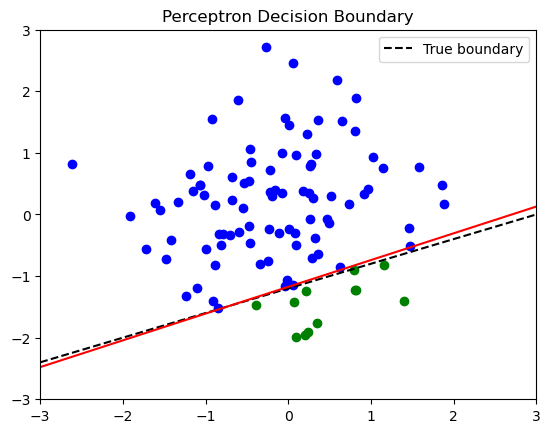

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
X = np.random.randn(100, 2)  
def true_label(x):
    return 1 if (2/5) * x[0] - (6/5) < x[1] else -1

y = np.array([true_label(x) for x in X])

# 2. Perceptron initialization
weights = np.random.randn(3)  # [bias, w1, w2]

def predict(x):
    x_with_bias = np.insert(x, 0, 1)  # add bias term
    return 1 if np.dot(weights, x_with_bias) >= 0 else -1

# 3. Training
learning_rate = 0.1
for epoch in range(20):
    for xi, target in zip(X, y):
        x_with_bias = np.insert(xi, 0, 1)
        prediction = predict(xi)
        if prediction != target:
            weights += learning_rate * target * x_with_bias

# 4. Plotting
def plot_decision_boundary(weights, color='r'):
    # weights: [bias, w1, w2]
    x_vals = np.linspace(-3, 3, 100)
    if weights[2] != 0:
        y_vals = -(weights[1] * x_vals + weights[0]) / weights[2]
    else:
        y_vals = np.zeros_like(x_vals)
    plt.plot(x_vals, y_vals, color=color)

# Scatter plot
for xi, yi in zip(X, y):
    plt.scatter(xi[0], xi[1], c='blue' if yi == 1 else 'green')

# Plot true boundary
true_x = np.linspace(-3, 3, 100)
true_y = (2/5) * true_x - (6/5)
plt.plot(true_x, true_y, 'k--', label='True boundary')

# Plot learned decision boundary
plot_decision_boundary(weights, color='red')

plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.legend()
plt.title('Perceptron Decision Boundary')
plt.show()
